** **
### Downloading dataset
** **

In [1]:
#Importing packages and downloading dataset
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
mnist

/Users/maurey/python/ml/code/ml_applications/machine_learning_projects/scikit-learn/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/maurey/python/ml/code/ml_applications/machine_learning_projects/scikit-learn/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [2]:
#Defining attributes and target variable

X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


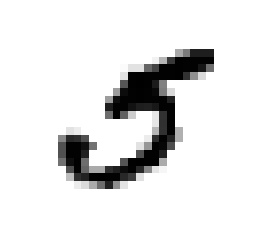

In [3]:
#Visualizing one datapoint for mnist
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

digit = X[36000]
digit_image = digit.reshape(28,28)

plt.imshow(digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [4]:
#Creating training and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
#Shuffle training set to avoid missing classes

import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

** **
### Training a binary classifier
** **

In [6]:
#Binary classifier capable of distinguishing between 5 and others

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [7]:
#Importing Stochastic Gradient Descend classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

/Users/maurey/python/ml/code/ml_applications/machine_learning_projects/scikit-learn/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
sgd_clf.predict([digit])

array([ True])

** **
### Measuring Accuracy using cross validation
** **

In [9]:
#Importing stratified folds to represent ratio of each class

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))

/Users/maurey/python/ml/code/ml_applications/machine_learning_projects/scikit-learn/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9682


/Users/maurey/python/ml/code/ml_applications/machine_learning_projects/scikit-learn/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.96265


/Users/maurey/python/ml/code/ml_applications/machine_learning_projects/scikit-learn/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9655


In [10]:
#Different implementation with cross val score

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

/Users/maurey/python/ml/code/ml_applications/machine_learning_projects/scikit-learn/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/maurey/python/ml/code/ml_applications/machine_learning_projects/scikit-learn/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/maurey/python/ml/code/ml_applications/machine_learning_projects/scikit-learn/sklearn/linear_model/stochastic_gradient.py:144: FutureWarni

array([0.9682 , 0.96265, 0.9655 ])

In [14]:
# Classifying with a very rudimentary (custom) function

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)


In [15]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9103 , 0.9081 , 0.91055])

In [17]:
# Confusion matrix for imbalanced data

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/Users/maurey/python/ml/code/ml_applications/machine_learning_projects/scikit-learn/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/maurey/python/ml/code/ml_applications/machine_learning_projects/scikit-learn/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/maurey/python/ml/code/ml_applications/machine_learning_projects/scikit-learn/sklearn/linear_model/stochastic_gradient.py:144: FutureWarni

In [18]:
#Invoking confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53735,   844],
       [ 1229,  4192]])

In [24]:
#Precision and recall metrics
from sklearn.metrics import precision_score, recall_score

print("precision: {}".format(precision_score(y_train_5, y_train_pred)))
print("recall: {}".format(recall_score(y_train_5, y_train_pred)))

precision: 0.8324066719618745
recall: 0.7732890610588452


In [25]:
#f1 score
from sklearn.metrics import f1_score

print("f1 score: {}".format(f1_score(y_train_5, y_train_pred)))

f1 score: 0.8017595868796022
